# Visualization in Seaborn
Seaborn is a Python library for data visualization. All possible diagram types can be plotted and an overview can be found here:
https://seaborn.pydata.org/examples/index.html.


* Seaborn supports complex visualization of data
* it is built on matplotlib but easier to use than matplotlib
* in the data analysis cycle Seaborn is useful for exploring data and communicating results


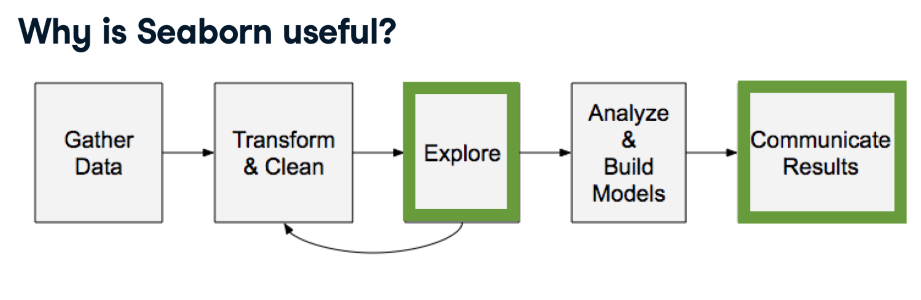

## Here is an **overview** of those graphs we want to address today:




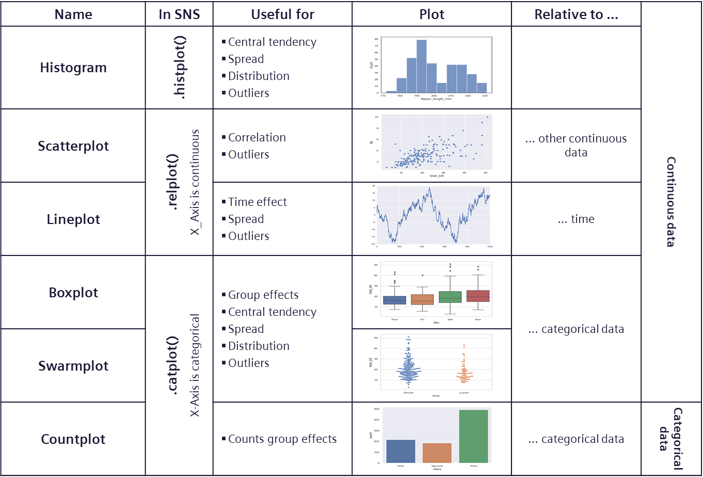

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('temp_sensor.csv', index_col=0)  # (!)
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S') # Make sure time index is in datetime format (important for line plots...)


# Example:
We will use (changed) data from a test sensor measuring the temperature of the burner basket at a position where it is usually not measured.

Name | Description 
-------- | -------- 
Tbask   | basket temperature  
A-stage, B_stage   | gas flow in different pipes of the burner  
AB_Bias/ AB_BiasSize   | Differences between A and B stage/ grouped in three size categories 
Tout   | temperature of gas leaving the turbine
RHamb   | relative ambient humidity  
Tamb   | ambient temperature 
Turbine  | plant and basket: the measures were taken in two plants on two different basekts   
rel_load   | % of load of the plant

In [2]:
df

,Tbask,A_stage,B_stage,AB_Bias,AB_BiasSize,Tout,RHamb,Tamb,Turbine,rel_load
"Date, Time",,,,,,,,,,
2016-05-28 21:34:29.910,395.236,35.3559,37.3495,-1.9936,low (-),499.060,66.8954,6.17710,PlantA_Bask14,100.0030
2018-03-30 20:53:07.890,392.903,39.1776,30.0614,9.1162,high (+),507.498,59.5495,3.80000,PlantB_Bask14,56.8414
2018-03-30 13:47:09.892,414.624,39.3117,30.0266,9.2851,high (+),507.224,61.3507,8.80000,PlantB_Bask14,57.8882
2018-03-24 03:28:23.936,405.525,39.3508,29.9109,9.4399,high (+),507.955,58.0485,2.80000,PlantB_Bask14,57.3942
2016-03-28 20:49:51.910,455.249,34.7042,36.7042,-2.0000,low (-),493.452,32.1008,-3.26808,PlantA_Bask14,99.9310
...,...,...,...,...,...,...,...,...,...,...
2018-03-21 14:47:23.954,402.838,35.5130,35.3866,0.1264,middle (+),498.169,73.5469,17.30000,PlantB_Bask03,90.1265
2018-03-24 10:51:03.934,417.332,39.2214,30.1118,9.1096,high (+),507.270,61.2313,6.00000,PlantB_Bask14,57.7540
2016-06-27 22:03:17.917,403.610,35.3571,37.3500,-1.9929,low (-),499.041,47.0314,13.42210,PlantA_Bask14,99.9976


___

# Histplots = Histogram
Histograms break a contiuous variable into artificial categories ('bins') and count the frequency in each bin.
They are especially usefull to show:
* central tendency (mean, median)
* spread
* distributions
* outliers

<AxesSubplot:xlabel='RHamb', ylabel='Count'>

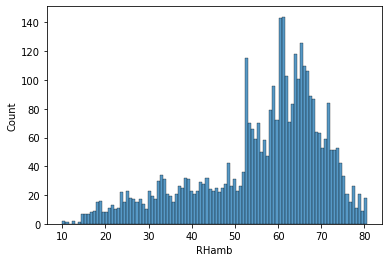

In [3]:
sns.histplot(
    data=df,
    x="RHamb",
    bins=100   # amount of bins on x-axis
)

___
# relplot() = Scatter Plot and Line Plot
#### "relational" plots  show the relationship between two quantitative variables

Why use relplot()?
* relplot() lets you create multiple subplots in a single figure.

* **Kind**: The kind parameter is used to specify which kind of plot you want.
It can be set to "scatter" or "line".

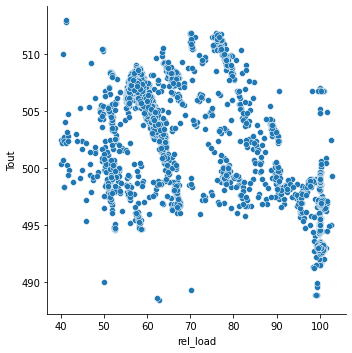

In [4]:
sns.relplot(
    data=df,
    x="rel_load",
    y="Tout",
    kind = "scatter"
)

<br>

## Options to Add a Third Categorical Variable
Often we want to goup our graphs by a third, categorical variable. Seaborn provides many options.
### Parameters:

***1) Hue***

***2) Row and Col***
  
<br>

### Hue: different colors wihtin one plot:

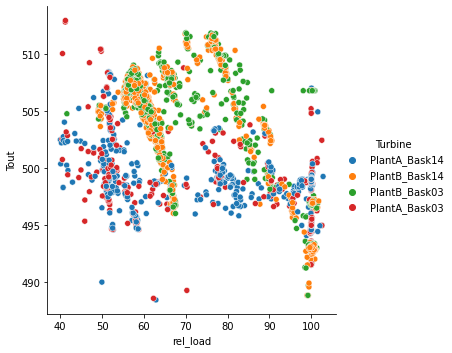

In [5]:
sns.relplot(
    data=df,
    x="rel_load",
    y="Tout",
    hue="Turbine",
    kind="scatter"
)

### Change order of categories and colors:  
* hue_order = [place a list]  
* palette = place a name

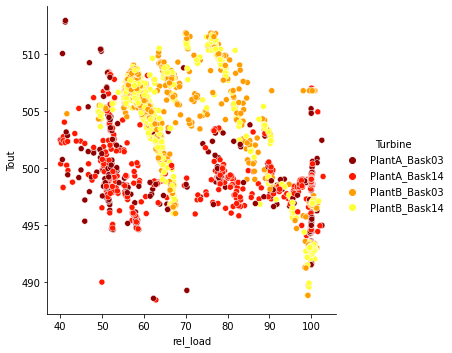

In [6]:
sns.relplot(
    data=df,
    x="rel_load",
    y="Tout",
    hue="Turbine",
    hue_order=["PlantA_Bask03","PlantA_Bask14","PlantB_Bask03","PlantB_Bask14"],
    palette="hot",
    kind="scatter"
)

#### HUE: Color Palettes

https://matplotlib.org/stable/tutorials/colors/colormaps.html

## 2) Subplots with Row and Col

With the ***row*** anc ***col*** parameter you can easily create subplots, split according to a categorial variable.

#### Split using into columns:

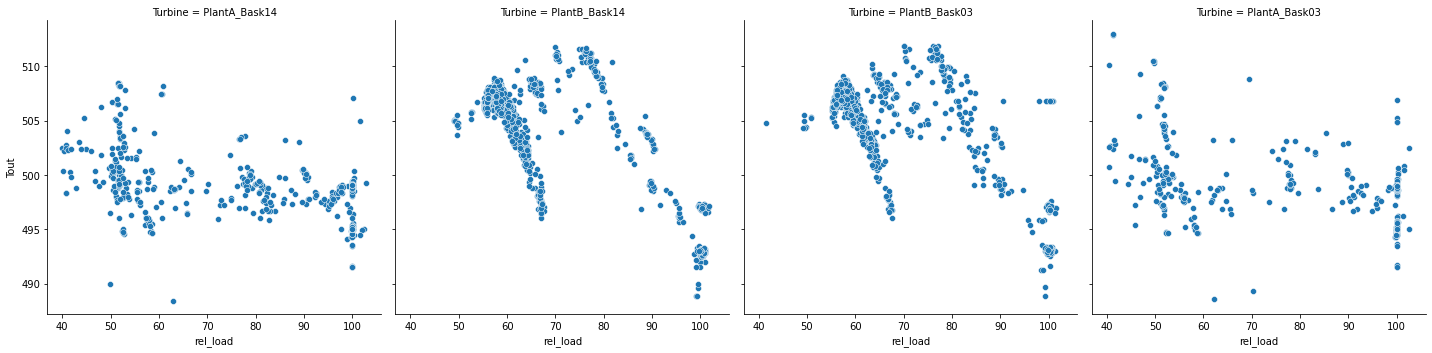

In [7]:
sns.relplot(
    data=df,
    x="rel_load",
    y="Tout",
    col="Turbine"
)

#### Wrapping columns in a 2x2 Matrix:

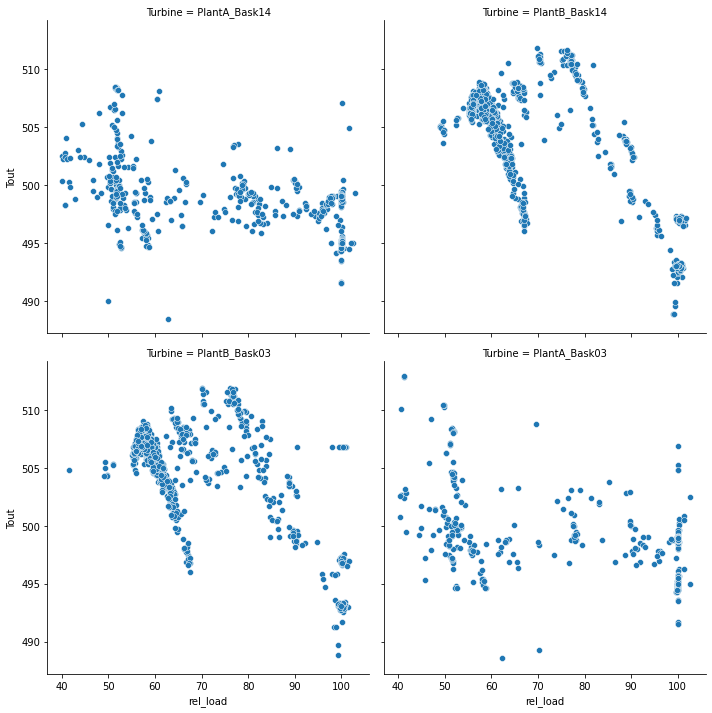

In [8]:
sns.relplot(
    data=df,
    x="rel_load",
    y="Tout",
    col="Turbine",
    col_wrap=2
)

#### Split into rows:

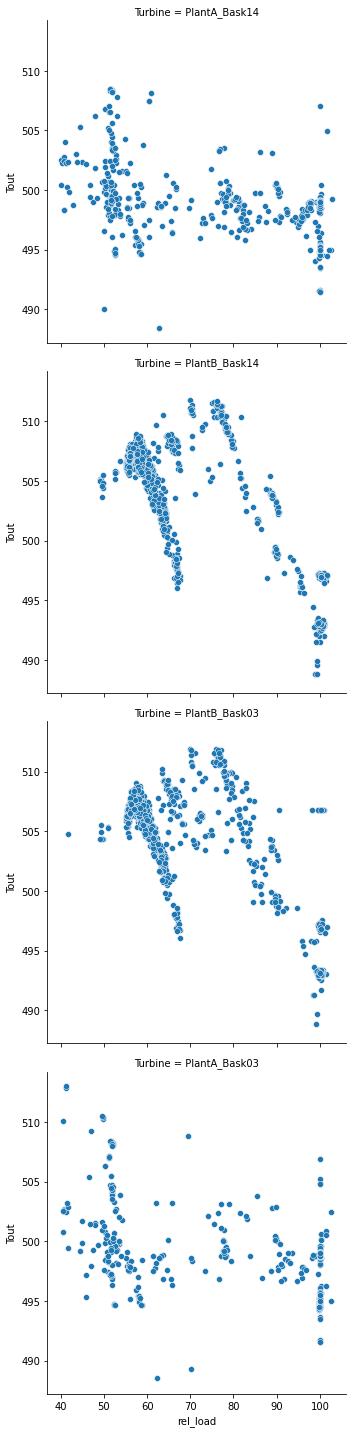

In [9]:
sns.relplot(
    data=df,
    x="rel_load",
    y="Tout",
    row="Turbine"
)

#### Split into columns and rows:

,Tbask,A_stage,B_stage,AB_Bias,AB_BiasSize,Tout,RHamb,Tamb,Turbine,rel_load
"Date, Time",,,,,,,,,,
2016-05-28 21:34:29.910,395.236,35.3559,37.3495,-1.9936,low (-),499.060,66.8954,6.17710,PlantA_Bask14,100.0030
2018-03-30 20:53:07.890,392.903,39.1776,30.0614,9.1162,high (+),507.498,59.5495,3.80000,PlantB_Bask14,56.8414
2018-03-30 13:47:09.892,414.624,39.3117,30.0266,9.2851,high (+),507.224,61.3507,8.80000,PlantB_Bask14,57.8882
2018-03-24 03:28:23.936,405.525,39.3508,29.9109,9.4399,high (+),507.955,58.0485,2.80000,PlantB_Bask14,57.3942
2016-03-28 20:49:51.910,455.249,34.7042,36.7042,-2.0000,low (-),493.452,32.1008,-3.26808,PlantA_Bask14,99.9310


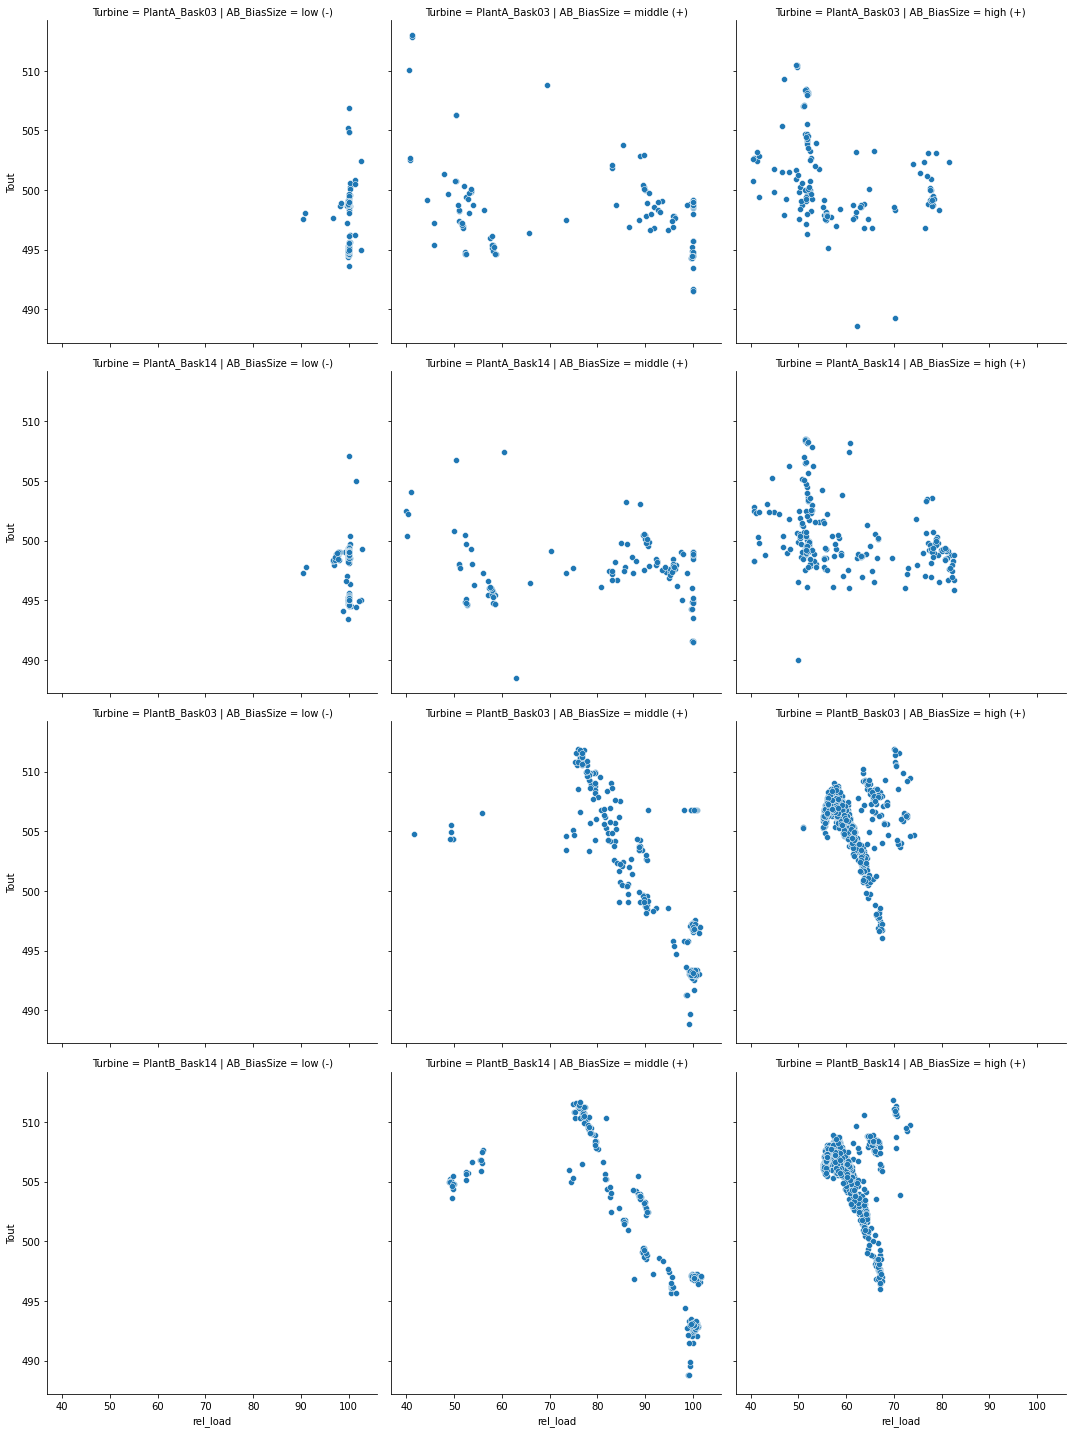

In [10]:
sns.relplot(
    data=df,
    x="rel_load",
    y="Tout",
    row="Turbine",
    row_order=["PlantA_Bask03","PlantA_Bask14","PlantB_Bask03","PlantB_Bask14"],
    col="AB_BiasSize",
    col_order=["low (-)","middle (+)","high (+)"]
)
df.head()

#### Other grouping options: 
- point size: size =
- style: style =
- transparency: i.e. alpha=0.5  

## Lineplots
- It is always important to plot data over time in conseutive order. </br>
- kind = line
- All grouping options learned work as well. </br>
Note: line plots usually need more time than scatterplots

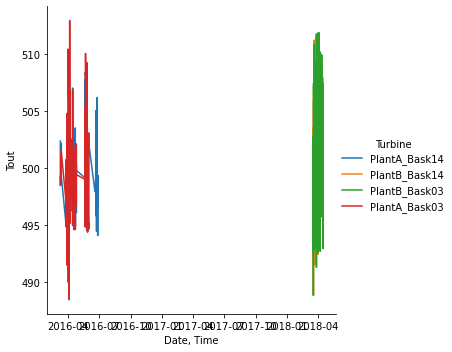

In [11]:
sns.relplot(
    data=df,
    x=df.index, # use index values as x
    y="Tout",
    hue="Turbine", # group by colors for all Turbine data
    kind="line",
    )

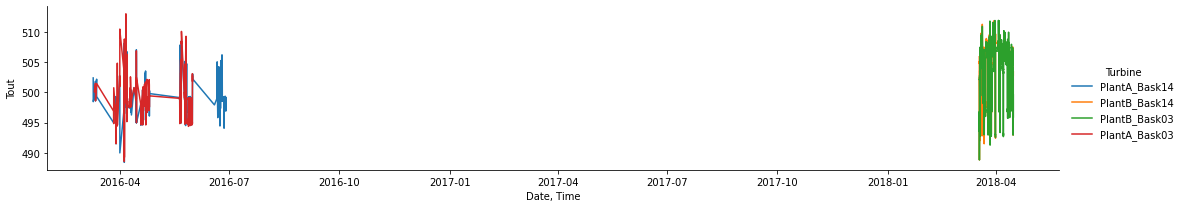

In [14]:
# change plot size:
sns.relplot(
    data=df,
    height=3,  # change height
    aspect=5,   # change width in relation to height
    x=df.index, # use index values as x
    y="Tout",
    hue="Turbine", # group by colors for all Turbine data
    kind="line",
)

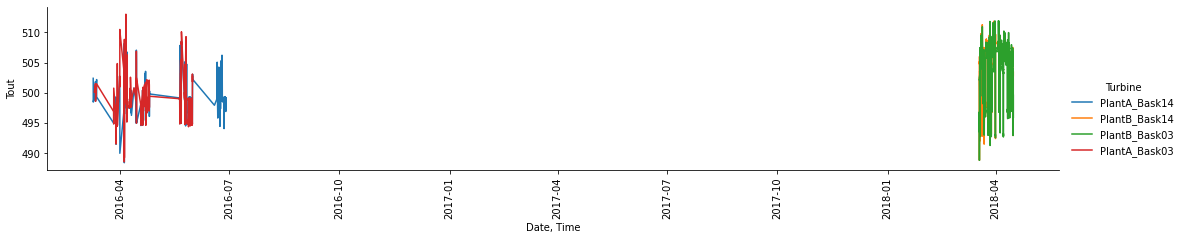

In [15]:
# to change x labels and other labels of the plot, create the plot object g...
g = sns.relplot(
    data=df,
    height=3,  # change height
    aspect=5,   # change width in relation to height
    x=df.index, # use index values as x
    y="Tout",
    hue="Turbine", # group by colors for all Turbine data
    kind="line"
)

# ... and apply methods to this plot object g
g.set_xticklabels(rotation=90)

#### Look up seaborn line plots for many more useful parameters, i.e. 

linewidth, markers, dashes, ci, ...

# Exercise

In the following we will examine a DataFrame with the following columns:

Name | Description 
-------- | -------- 
Burner   | Burner number 
Plant   | Plant name  
Start   | Start number
ignition   | Has the burner ignited? Yes=1.0, No=0.0
first_ON   | Timestamp when the burner was classified as ON for the first time
temp_range   | flashback temperature max - flashback temperature min
temp_begin  | flashback temperature at the begin of the start  

**First:** Run the lines of code below to load in the DF.

In [16]:
task_df = pd.read_csv("data.csv", index_col=0)
task_df

,Burner,Plant,Start,ignition,first_ON,temp_range,temp_begin
index,,,,,,,
0,1,Plant_A,194,0.0,NaN,39.700012,20.100006
1,1,Plant_A,196,0.0,NaN,34.300018,18.399994
2,1,Plant_B,102,0.0,NaN,8.299988,31.600006
3,1,Plant_B,103,0.0,NaN,8.299988,32.200012
4,1,Plant_B,104,0.0,NaN,7.399994,34.000000
...,...,...,...,...,...,...,...
324,15,Plant_H,57,1.0,3.111,55.200012,38.500000
325,7,Plant_O,35,1.0,2.158,56.000000,28.800018
326,3,Plant_I,41,1.0,2.150,61.899994,85.500000


1. Use the Pandas methods from before to look into the DataFrame more closely. </br> 
   Try to understand what information you can get and think about what columns would fit as grouping variables.

In [17]:
# Write your code here #


2. Create a **Relplot** as a **Scatterplot**. </br> 
Use the **task_df** DataFrame. </br> 
Plot **"temp_range"** vs. **"temp_begin"** (y vs. x)

In [18]:
# Write your code here #


3. Copy your code from above.

   Let's find out whether the burner acctually ignited.
   
   Group the datapoints via the column **ignition** using the **hue** parameter (color) and add the **color palette** "magma".

In [19]:
# Write your code here #


4. Copy your code from above.

   Finally, group the plots by all given **Plant** in columns. Use **col_wrap** to organize them in a 4x4 matrix.
   
   Set the parameter **"s"** (= size) to a higher number (100) so that the points in this large figure are easier to spot.

In [20]:
# Write your code here #


___
# catplot() = Categorical Plots

Categorical plots plot categories on the X axis of a chart. They are ideal to compare groups.
* similiar to relplot(), same advantages regarding subplots etc.

Lets review our overview on charts:

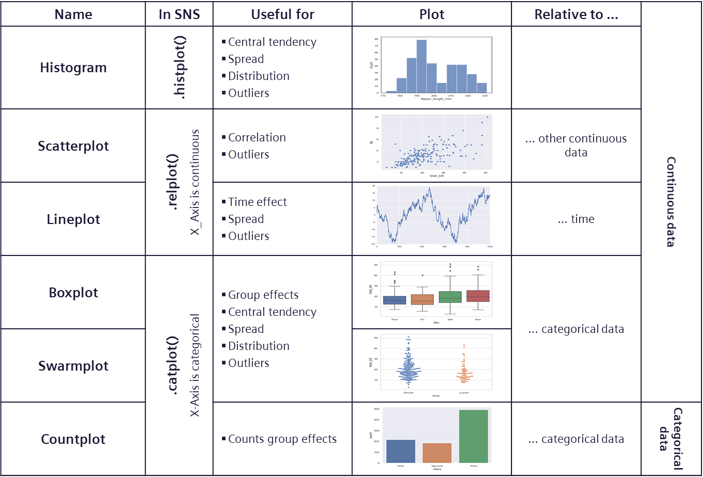

So we will look at ***boxplot, swarmplot and countplot*** (as beeing the most usefull once of many others)

## Box plot

* y axis is continuous
* show most things a Histogram shows (center, spread, skewness of distribution, outliers)
* use  much less space -> easy to compare many groups 
* are a bit harder to read - note that the width of the boxes does not matter, just their length!


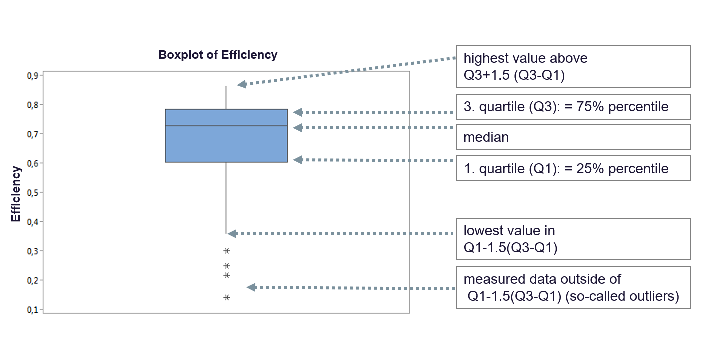

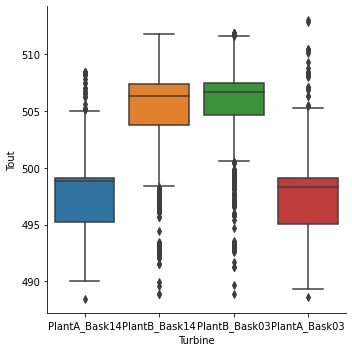

In [21]:
sns.catplot(
    data=df,
    x="Turbine",
    y="Tout",
    kind="box"
)

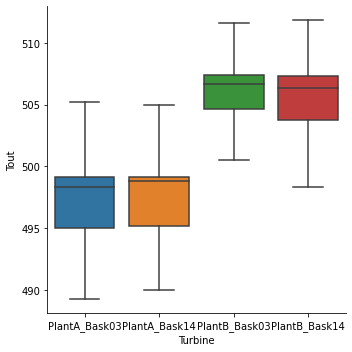

In [22]:
# **order** parameter sorts categories 
# sym="" removes outliers

sns.catplot(
    data=df,
    x="Turbine",
    y="Tout",
    kind="box",  
    order=["PlantA_Bask03","PlantA_Bask14","PlantB_Bask03","PlantB_Bask14"],
    sym=""
)

## Swarm Plots
* a "categorical scatterplot" 
* y axis is continuous, x axis categorical
* tries to plot every single datapoint: here the width of the graph does matter
* cuts of plotting identical values if space does not allow it
* shows center, spread and outliers, and part of the distribution

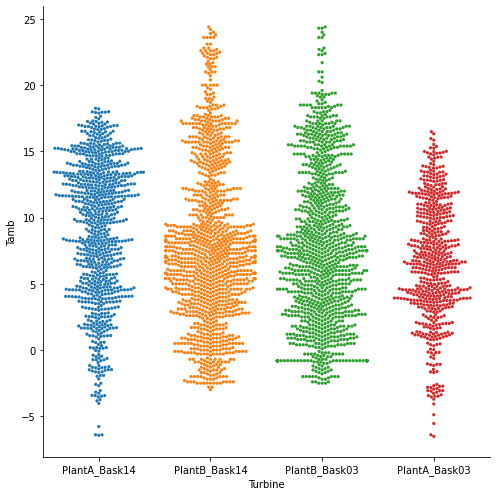

In [23]:
sns.catplot(
    data=df,
    height=7,
    x="Turbine",
    y="Tamb",
    hue="Turbine",
    kind="swarm",
    s=3.2 # adapts point size
)

### Countplots
* counting amount of data points per category
* often know ans bar chart

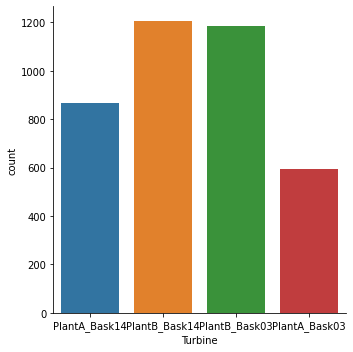

In [24]:
sns.catplot(
        data=df,
        x="Turbine",
        kind="count"
)

**FYI**: While Catplot provides a variety of kinds of plots, most plots can also be created by calling the actual name of the plot. The result are the same.

<AxesSubplot:xlabel='Turbine', ylabel='count'>

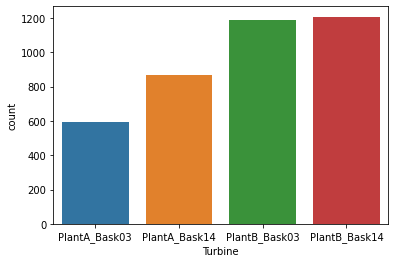

In [25]:
sns.countplot(
    data=df,
    x="Turbine",
    order=["PlantA_Bask03","PlantA_Bask14","PlantB_Bask03","PlantB_Bask14"]
)

# Exercise

Let's import a new dataset. It contains **approvals** for budget releases to  manufacturing  gas turbines (GT), steam turbines (ST) and generators (Geno). Since this process comes with financial risks, the decision comes sometimes later than originally agreed for supply and manufacturing. 

Name | Description 
-------- | -------- 
Quartal   | quartal/ year of decision
Machine_type   | specific frame information, i.e. SGT5-4000F(6)
Machine_category   | general typ - GT/ SU/ GN 
Decision_late(days)   | Difference of decision due date and actual response date, in days (negative = admin team responded too late)
on_time/late?   | Admin response late? Yes = late, No = on time
Decision   | machine production was actually approved or denied (the production slot was cancelt)

In [26]:
# Please, don't change this line
approvals = pd.read_excel('approvals.xlsx', index_col=0)

approvals[:15]

,Quartal,Machine_type,Machine_category,Decision_late(days),on_time/late?,Decision
ID,,,,,,
0,1/2012,SGT5-2000E (7),GT,0.0,on time,Canceled/Denied
1,1/2012,SGT5-2000E (7),GT,0.0,on time,Canceled/Denied
2,1/2012,SGT5-4000F (9),GT,0.0,on time,Canceled/Denied
3,1/2012,SGT5-4000F (7),GT,0.0,on time,Canceled/Denied
4,1/2012,SGT6-5000F (4),GT,0.0,on time,Canceled/Denied
5,1/2012,SGT6-8000H (1.3),GT,0.0,on time,Canceled/Denied
6,1/2012,SGT6-8000H (1.4),GT,0.0,on time,Canceled/Denied
7,1/2012,SST6-5000 HI-L,ST,-413.0,late,Canceled/Denied
8,1/2012,SGen5-100A (115/36 DTC),Geno,0.0,on time,Canceled/Denied


1. Create a **Countplot** to count how often each GT, ST, Geno was „approved“ or „Cancelt/ Denied“ (see column "new workflow step")

Hint: Use the "hue" parameter to categorize between the individual machine types (see column "Machine_category")

In [27]:
# write your code here

2. Create a **boxplot** of "Decision_late(days)" vs. "Machine_category", to see which machines had more delays than others. Try to remove the outliers.

In [28]:
# write your code here

<ins>Many more Seaborn plots can be found here:</ins>

https://seaborn.pydata.org/examples/index.html

For regression analysis, take a look at **regplot()** and **lmplot()**.

___
# EXTRA Reading Material / Out of Training Scope

## Plotting Multiple Elements in One Figure
* using plt.subplots()
* ax parameter: specify where plot should be placed

In [ ]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax2 = ax1.twinx() # create axis with same x-axis -> different y-axes

sns.scatterplot(
    data=df,
    x="rel_load",
    y="Tout",
    color="r",
    ax=ax1
)

sns.scatterplot(
    data=df,
    x="rel_load",
    y="Tamb",
    ax=ax2
)

## Characterization

#### Why do we customize?

* for personal preference
* to improve readability
* to guide interpretation

#### Seaborn's "set" methods
* set_style():  </br>  affects things like color of axes, whether grid is enabled by default and other aesthetic elements
* set_context(): </br> affects things like size of labels, lines and other elements of the plot, but not the overall style
* set_palette(): </br> set matplotlib color cycle using seaborn palette
* set(): </br> set everything to default if no parameter given

**Note:** Methods vary for FacetGrid and AxesSubplot Objects - will not be further explored here

</br>

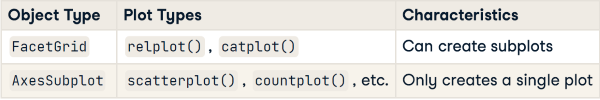

In [ ]:
sns.set_style("whitegrid")        
# options: darkgrid, whitegrid, dark, white, ticks

sns.set_context("talk")      
# options: paper, notebook, talk, poster

sns.set_palette("husl")
# various options (see link above)

# set labels and title
plt.title("Plot Title")
plt.xlabel("")
plt.ylabel("")

# set limits for x and y axis
plt.xlim(30,110)
plt.ylim(477,517)

sns.scatterplot(
    data=df, 
    x="rel_load", 
    y="Tout",
    s=100  # specify size of markers
)

sns.set()

# save the plot, specify name, optional: change path
plt.savefig("myplot.png")

# Showing, closing and clearing plots (not necessary in JupyterNotebook)
plt.show()  # show the plot
plt.cla()   # clear an axis
plt.clf()   # clear a figure
plt.close() # close a window

All figure aesthetics such as line thickness, color palette, dot size can be varied and changed. More information under: http://seaborn.pydata.org/tutorial/aesthetics.html

In [ ]:
plt.figure(figsize=(1,1))

sns.catplot(data=approvals,
        kind="count",
        x="MACHINE_TYPE", 
        height=3,  # change height
        aspect=5,   # change width in relation to height
           ).set_xticklabels(rotation=90) # rotate x labels by 90 degrees

In [ ]:
approvals.info()

## A complete overview of all cat plots:

They are ideal for comparisons among groups.

**Categorical estimate plots:**

* **countplot()** (with kind="count")

* pointplot() (with kind="point")

* barplot() (with kind="bar")


**Categorical scatterplots:**

* **swarmplot()** (with kind="swarm")

* stripplot() (with kind="strip"; the default)


**Categorical distribution plots:**

* **boxplot()** (with kind="box")

* violinplot() (with kind="violin")

* boxenplot() (with kind="boxen")


Let's look at a few of them. 

</br>